<a href="https://colab.research.google.com/github/nireasir/auth-dws-ml2526/blob/main/MLex6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [1]:
!pip install ydata_profiling

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 398.7/398.7 kB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.7/296.7 kB 21.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 75.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.7/679.7 kB 43.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.4/105.4 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.3/43.3 kB 3.1 MB/s eta 0:00:00


In [17]:
import pandas as pd
from ydata_profiling import ProfileReport
from sklearn.impute import SimpleImputer
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from PIL import Image
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import umap.umap_ as umap

# Ερώτημα 1

In [4]:
df=pd.read_csv("bankloan.csv")

In [5]:
profile=ProfileReport(df,title="Pandas Profiling Report")
profile.to_file("report.html")


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 53/53 [00:12<00:00,  4.39it/s]
/usr/local/lib/python3.12/dist-packages/pandas/core/nanops.py:1632: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  return spearmanr(a, b)[0]
/usr/local/lib/python3.12/dist-packages/pandas/core/nanops.py:1632: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  return spearmanr(a, b)[0]
/usr/local/lib/python3.12/dist-packages/pandas/core/nanops.py:1632: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  return spearmanr(a, b)[0]
/usr/local/lib/python3.12/dist-packages/pandas/core/nanops.py:1632: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  return spearmanr(a, b)[0]
/usr/local/lib/python3.12/dist-packages/pandas/core/nanops.py:1632: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  return spearmanr(a, b)[0]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# Ερώτημα 2

**1)** Το μέσο ποσό είναι 15257.966, το μέγιστο είναι 35000 και το ελάχιστο είναι 1000 (φαίνονται στο html αρχείο).

**2)** Τα IDs δε προσφέρουν κάτι στο training οπότε αφαιρούνται. Επιπλέον αφαιρούνται και τα χαρακτηριστικά που είναι ημερομηνίες καθώς ούτε αυτα προσφέρουν κάτι στο training, ενώ τα grade, sub_grade και loan_status αφαιρούνται γιατί ουσιαστικά μας δίνουν το αποτέλεσμα. Τέλος, το total_pymnt και last_pymnt_amnt αφαιρούνται γιατί δε μας δίνουν κάποια χρήσιμη πληροφορία για το training.

In [5]:
input_df = df.drop(columns=['id','member_id','issue_d','last_pymnt_d','next_pymnt_d','grade','sub_grade','loan_status','total_pymnt','last_pymnt_amnt'])

**3)** Συμπληρώνουμε τα missing values. Οι αριθμητικές μεταβλητές που λείπουν συμπληρώθηκαν με τον μέσο όρο, ενώ οι κατηγορικές με τη πιο συχνή τιμή.

In [6]:
input_df = input_df.dropna(axis=1, how='all')
num_cols = input_df.select_dtypes(include=['int64', 'float64']).columns
cat_cols = input_df.select_dtypes(include=['object']).columns
num_imputer = SimpleImputer(strategy='mean')
input_df[num_cols] = num_imputer.fit_transform(input_df[num_cols])
cat_imputer = SimpleImputer(strategy='most_frequent')
input_df[cat_cols] = cat_imputer.fit_transform(input_df[cat_cols])

**4)** Παρακάτω βλέπουμε ότι η τράπεζα δίνει δάνεια σε λίγους ανθρώπους καθώς το ποσοστό των accepted_candidate είναι περίπου μόλις 11%.

In [7]:
input_df['accepted_candidate'] = np.where(df['sub_grade'].isin(['A','B1','B2']), 1, 0)
print(input_df['accepted_candidate'].value_counts(normalize=True))


accepted_candidate
0    0.885361
1    0.114639
Name: proportion, dtype: float64


**5)** Παρακάτω παρατηρούμε ότι δεν υπάρχει κάποιο εύρος τιμών για το οποίο η πιθανότητα αποδοχής είναι μεγαλύτερη απο 15%.

In [8]:
bins = range(0, int(input_df['loan_amnt'].max()) + 5000, 5000)
input_df['amnt_bin'] = pd.cut(input_df['loan_amnt'], bins=bins)
acceptance15=input_df.groupby('amnt_bin')['accepted_candidate'].mean()
print(acceptance15)

amnt_bin
(0, 5000]         0.119749
(5000, 10000]     0.147393
(10000, 15000]    0.113122
(15000, 20000]    0.110327
(20000, 25000]    0.098075
(25000, 30000]    0.081842
(30000, 35000]    0.060988
Name: accepted_candidate, dtype: float64


/tmp/ipython-input-4091645705.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  acceptance15=input_df.groupby('amnt_bin')['accepted_candidate'].mean()


# Ερώτημα 3

**1)** Επιλέγουμε το Robust Scaler το οποίο δεν επηρεάζεται από outliers. Εδώ, έχουμε μερικές ακραίες τιμές (π.χ. στο εισόδημα ή στο μέγεθος του δανείου).

In [9]:
scaler=RobustScaler()
input_df[num_cols]=scaler.fit_transform(input_df[num_cols])

**2)**

In [10]:
input_df = input_df.drop(columns=['amnt_bin'], errors='ignore')
x=input_df.drop(columns=['accepted_candidate'])
y=input_df['accepted_candidate']
cat_cols = x.select_dtypes(include=['object']).columns
enc = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
x[cat_cols] = enc.fit_transform(x[cat_cols])
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42,stratify=y)

**3)** Οι μεταβλητές grade και sub_grade που μας δίνουν κατευθείαν το αποτέλεσμα αφαιρέθηκαν σε προηγούμενο ερώτημα. Η μεταβλητή που θα αφαιρεθεί τώρα είναι το int_rate που αναφέρεται στο επιτόκιο. Χαμηλό επιτόκιο αντιστοιχεί σε υψηλές κατηγορίες (Α,Β1 κλπ).

In [11]:
x_train=x_train.drop(columns=['int_rate'])
x_test=x_test.drop(columns=['int_rate'])

Το μοντέλο που επιλέχθηκε είναι το Decision Tree καθώς είναι πιο ερμηνεύσιμο. Οι αποφάσεις τις τράπεζας δηλαδή σχετικά με το ποιος θα πάρει δάνειο και ποιος όχι θα πρέπει να είναι σαφείς και επεξηγήσιμες. Επίσης, με το class_weight=balanced, αποφεύγουμε το μοντέλο να είναι μεροληπτικό προς τη πιο συχνή κλάση.

In [12]:
model=DecisionTreeClassifier(random_state=42,class_weight='balanced')
cvscores=cross_val_score(model,x_train,y_train,cv=5,scoring='f1')
model.fit(x_train,y_train)

DecisionTreeClassifier(class_weight='balanced', random_state=42)

**4)**

In [13]:
y_pred=model.predict(x_test)
accuracy=accuracy_score(y_test,y_pred)
precision=precision_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)
f1=f1_score(y_test,y_pred)
print("accuracy:",accuracy)
print("precision:",precision)
print("recall:",recall)
print("f1:",f1)

accuracy: 0.9368388106416276
precision: 0.7325038880248833
recall: 0.7073037542662116
f1: 0.7196832893457424


# Ερώτημα 4

**1)**

In [17]:
model=RandomForestClassifier(n_estimators=150,random_state=42,class_weight='balanced',max_depth=8)
model.fit(x_train,y_train)
f_importances=model.feature_importances_
f_names=x_train.columns
ordered=np.argsort(f_importances)[::-1]
top15 = [(f_names[i], f_importances[i]) for i in ordered[:15]]
for name,score in top15:
  print(f"{name} {score:.4f}")

total_rec_int 0.2473
verification_status 0.1099
installment 0.0996
term 0.0967
total_rec_prncp 0.0893
out_prncp 0.0408
total_rev_hi_lim 0.0369
purpose 0.0354
funded_amnt 0.0334
loan_amnt 0.0330
dti 0.0300
title 0.0249
annual_inc 0.0204
revol_util 0.0191
inq_last_6mths 0.0191


**2)**

In [20]:
fnames=[]
for name,score in top15:
  fnames.append(name)
corr_matrix=x_train[fnames].corr()
corr_matrix

,total_rec_int,verification_status,installment,term,total_rec_prncp,out_prncp,total_rev_hi_lim,purpose,funded_amnt,loan_amnt,dti,title,annual_inc,revol_util,inq_last_6mths
total_rec_int,1.000000,0.103086,0.569019,0.410101,0.473764,0.553839,0.113683,-0.048423,0.612979,0.612979,0.017651,-0.064603,0.113389,0.156842,0.044907
verification_status,0.103086,1.000000,0.090055,-0.039266,-0.010298,0.038382,-0.068276,0.070548,0.043664,0.043664,0.016341,0.059068,0.000055,0.163755,0.074117
installment,0.569019,0.090055,1.000000,0.122935,0.494174,0.899546,0.325996,-0.136314,0.942287,0.942287,0.001718,-0.152095,0.275947,0.127542,-0.006885
term,0.410101,-0.039266,0.122935,1.000000,-0.105643,0.417287,0.064820,-0.066398,0.401560,0.401560,0.026758,-0.067663,0.038552,0.095919,-0.001665
total_rec_prncp,0.473764,-0.010298,0.494174,-0.105643,1.000000,0.314401,0.187937,-0.085576,0.423519,0.423519,-0.014155,-0.085643,0.146921,0.025016,-0.035735
out_prncp,0.553839,0.038382,0.899546,0.417287,0.314401,1.000000,0.344381,-0.157538,0.969074,0.969074,0.006042,-0.164524,0.272387,0.125345,-0.039380
total_rev_hi_lim,0.113683,-0.068276,0.325996,0.064820,0.187937,0.344381,1.000000,-0.069778,0.354745,0.354745,0.017711,-0.064509,0.268231,-0.108109,0.014911
purpose,-0.048423,0.070548,-0.136314,-0.066398,-0.085576,-0.157538,-0.069778,1.000000,-0.160090,-0.160090,-0.012427,0.833286,-0.004528,-0.096515,0.030494
funded_amnt,0.612979,0.043664,0.942287,0.401560,0.423519,0.969074,0.354745,-0.160090,1.000000,1.000000,0.004998,-0.168937,0.281788,0.128014,-0.035479
loan_amnt,0.612979,0.043664,0.942287,0.401560,0.423519,0.969074,0.354745,-0.160090,1.000000,1.000000,0.004998,-0.168937,0.281788,0.128014,-0.035479


Παρατηρούμε ότι τα περισσότερα χαρακτηριστικά έχουν χαμηλή προς μεσαία συσχέτιση μεταξύ τους. Υπάρχουν όμως και παραδείγματα όπου έχουμε υψηλή συσχέτιση, όπως το installment με το loan_amnt (0.94+), καθώς οι δόσεις εξαρτούνται από το πόσο μεγάλο είναι το δάνειο.

**3)**

# Ερώτημα 4

**1)**

In [3]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


**2)**

In [5]:
x_train_reshaped = x_train.reshape(x_train.shape[0], -1)
x_test_reshaped = x_test.reshape(x_test.shape[0], -1)
scaler=StandardScaler()
x_train_scld=scaler.fit_transform(x_train_reshaped)
x_test_scld=scaler.transform(x_test_reshaped)

**3)**

In [7]:
pca = PCA(n_components=300)
x_train_pca=pca.fit_transform(x_train_scld)
x_test_pca=pca.transform(x_test_scld)


Ο λόγος για τον οποίο δεν εφαρμόσαμε την fit transform στο test set ή και στα δύο set μαζί, είναι ότι θα είχαμε διαρροή πληροφορίας. Αυτό συμβαίνει διότι οι κύριες συνιστώσες θα προέκυπταν με βάση και παραδείγματα από το test set.

In [8]:
results=[]
for k in [5,15,51,101]:
  model_knn=KNeighborsClassifier(n_neighbors=k)
  model_knn.fit(x_train_pca,y_train)
  y_pred=model_knn.predict(x_test_pca)
  acc=accuracy_score(y_test,y_pred)
  results.append(acc)
  print(f"for k={k}, accuracy is {acc:.4f}")

for k=5, accuracy is 0.9497
for k=15, accuracy is 0.9436
for k=51, accuracy is 0.9273
for k=101, accuracy is 0.9158


**4)**

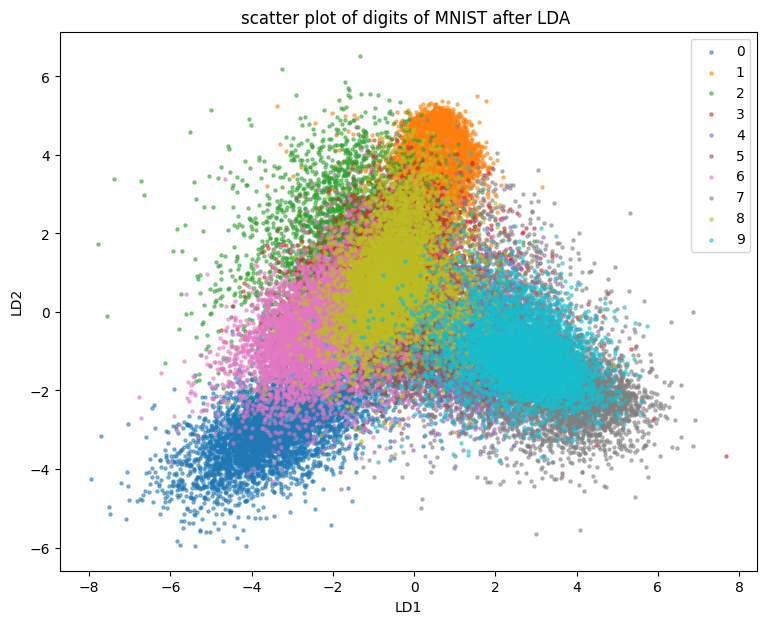

In [15]:
model_lda = LinearDiscriminantAnalysis(n_components=2)
x_train_lda = model_lda.fit_transform(x_train_scld, y_train)
x_test_lda = model_lda.transform(x_test_scld)
plt.figure(figsize=(9,7))
for digit in range(10):
    idx = (y_train == digit)
    plt.scatter(x_train_lda[idx, 0],x_train_lda[idx, 1],s=5,alpha=0.5,label=str(digit) )
plt.xlabel("LD1")
plt.ylabel("LD2")
plt.title("scatter plot of digits of MNIST after LDA ")
plt.legend()
plt.show()

Αυτό που παρατηρείται εδώ είναι ότι έχουμε απώλεια πληροφορίας, καθώς τα 2 χαρακτηριστικά δε φτάνουν για πλήρη διαχωρισμό των κλάσεων. Μόνο τα ψηφία 0 και 1 έχουν πιο ξεκάθαρα clusters. 3,5 και 8 επικαλύπτονται αρκετά μεταξύ τους, ενώ το ίδιο ισχύει και για το 4 με το 9.

**5)**

In [16]:
!pip install umap-learn

/usr/local/lib/python3.12/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


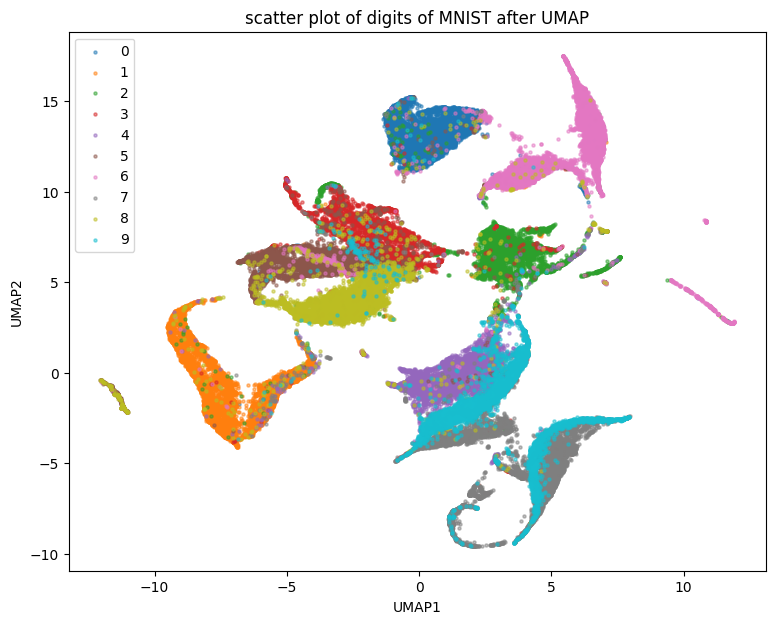

In [20]:
model_umap = umap.UMAP(n_components=2,random_state=42,n_neighbors=10, min_dist=0.1)
x_train_umap = model_umap.fit_transform(x_train_scld)
x_test_umap = model_umap.transform(x_test_scld)
plt.figure(figsize=(9,7))
for digit in range(10):
    idx = (y_train == digit)
    plt.scatter(x_train_umap[idx, 0],x_train_umap[idx, 1],s=5,alpha=0.5,label=str(digit))
plt.xlabel("UMAP1")
plt.ylabel("UMAP2")
plt.title("scatter plot of digits of MNIST after UMAP")
plt.legend()
plt.show()

Παρατηρείται ότι στη UMAP τα clusters των περισσότερων ψηφίων είναι αρκετά πιο ευδιάκριτα και με αρκετά μικρότερη επικάλυψη σε σχέση με την LDA